# Exercise 2-Classification

# Loading the necessary packages.

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

# 1. Decision Tree

# Loading the data:

In [2]:
patient_details=pd.read_csv('/home/dbda/Desktop/PML/Assignments/Assignment 2/indian_liver_patient.csv',sep=',')

# Exploring the imported data:

In [3]:
patient_details.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
patient_details.shape

(583, 11)

In [5]:
patient_details.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
patient_details.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object

In [7]:
patient_details.Label.value_counts()

1    416
2    167
Name: Label, dtype: int64

This label value 1 indicates liver patient while 2 indicates non-liver patient(since it is given that there are 416 liver patients and 167 non-liver patients).

In [8]:
patient_details.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Label                         False
dtype: bool

This shows that the column 'Albumin_and_Globulin_Ratio' contains null values.

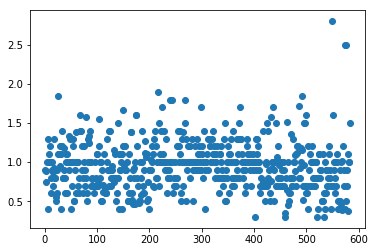

In [9]:
y=np.arange(1,584)
plt.scatter(y,patient_details['Albumin_and_Globulin_Ratio'])

As per the plot above, since the column 'Albumin_and_Globulin_Ratio' does not contain large number of outliers, mean of all the values in the column will be used to replace the null values.

In [10]:
#patient_details['Albumin_and_Globulin_Ratio']
patient_details['Albumin_and_Globulin_Ratio'].fillna(patient_details.Albumin_and_Globulin_Ratio.mean(),inplace=True)

In [11]:
patient_details.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Label                         False
dtype: bool

In [27]:
patient_details.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


As can be seen above, the column 'Albumin_and_Globulin_Ratio' no longer has null values.

# Data Preparation

# Converting Categorical Data to Numerical Data

Since 'Gender' column in the dataset has categorical data, it will need to be converted to numerical values. LabelEncoder is being used for this purpose.

In [12]:
le = LabelEncoder()
patient_details['Gender']=le.fit_transform(patient_details['Gender'])

In [13]:
patient_details.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object

# Splitting data into Training and Testing Sets

In [14]:
patient_details_train = patient_details.sample(480, random_state = 47)
patient_details_test = patient_details.drop(patient_details_train.index)

Checking if the percentage of liver patients and non-liver patients in the data set is maintained in the training and test set:

Percentage in the actual dataset:

In [15]:
(patient_details.Label.value_counts()/patient_details.Label.count())*100

1    71.35506
2    28.64494
Name: Label, dtype: float64

Percentage in the training set:

In [16]:
(patient_details_train.Label.value_counts()/patient_details_train.Label.count())*100

1    70.0
2    30.0
Name: Label, dtype: float64

Percentage in the test set:

In [17]:
(patient_details_test.Label.value_counts()/patient_details_test.Label.count())*100

1    77.669903
2    22.330097
Name: Label, dtype: float64

Thus, the percentage of liver patients and non-liver patients in the data set is maintained in the training and test set.

In [18]:
train_labels=patient_details_train.Label
test_labels=patient_details_test.Label

In [19]:
def standardization(dataset):
    dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
    #print(dtypes)
    # Normalize numeric columns.
    for column, dtype in dtypes:
        #if dtype == 'float32':
        dataset[column] -= dataset[column].mean()
        dataset[column] /= dataset[column].std()
    return dataset

In [20]:
patient_details_train_standardized = standardization(patient_details_train)
patient_details_test_standardized = standardization(patient_details_test)
patient_details_test_standardized.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02
mean,5.066066e-17,3.125871e-17,9.000352e-17,1.243696e-16,8.623091e-17,3.368395e-17,1.239569e-17,2.945325e-16,4.117526e-16,-2.047984e-16,1.185675e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.105769e+00,-2.238238e+00,-6.203277e-01,-6.328829e-01,-9.076433e-01,-3.784112e-01,-2.903551e-01,-2.760399e+00,-2.435585e+00,-1.848061e+00,-5.335811e-01
25%,-8.317052e-01,4.424424e-01,-5.764446e-01,-5.903327e-01,-5.646205e-01,-3.130449e-01,-2.595870e-01,-6.543168e-01,-8.182587e-01,-5.925985e-01,-5.335811e-01
50%,1.767079e-02,4.424424e-01,-4.009123e-01,-4.201318e-01,-4.337302e-01,-2.612026e-01,-2.149237e-01,1.038728e-01,8.025565e-02,3.513272e-02,-5.335811e-01
75%,7.457073e-01,4.424424e-01,2.694761e-02,4.792064e-02,1.535890e-02,-1.507561e-01,-9.582143e-02,6.935758e-01,8.589681e-01,3.489983e-01,-5.335811e-01
max,1.837762e+00,4.424424e-01,4.206810e+00,4.345493e+00,3.700598e+00,7.149984e+00,9.468090e+00,2.799658e+00,2.116888e+00,3.016856e+00,1.855934e+00


# Training and testing the model

In [21]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=6,min_samples_split=12)

In [22]:
#Training the model with the train data.
clf.fit(patient_details_train_standardized.iloc[:,:-1],train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
#Making predictions on the test data.
predictions = clf.predict(patient_details_test_standardized.iloc[:,:-1])

In [24]:
predictions

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

# Evaluating the model

Confusion Matrix

In [25]:
confusion_matrix(test_labels,predictions)

array([[74,  6],
       [19,  4]])

Simple Accuracy

In [26]:
accuracy_score(test_labels,predictions)*100

75.72815533980582